In [1]:
import torch
from train import Trainer
import matplotlib.pyplot as plt


%load_ext autoreload
%autoreload 2

In [2]:
def test(model, input_text):
    """
    Test the model by providing a sequence of text and predicting the next character.
    """
    model.model.eval()
    with torch.no_grad():

        input_indices = [model.dataloader.stoi[char] for char in input_text]
        x_test = torch.tensor(input_indices)
        
        # Predict the next character
        output = model.model(x_test) # (1, vocab_size)
        predicted_index = torch.argmax(output[-1,:]).item()  # Index of predicted character
        
        # Decode index to character
        predicted_letter = [k for k, v_ in model.dataloader.stoi.items() if v_ == predicted_index]

    
    return predicted_letter

100%|██████████| 50000/50000 [05:55<00:00, 140.61it/s]


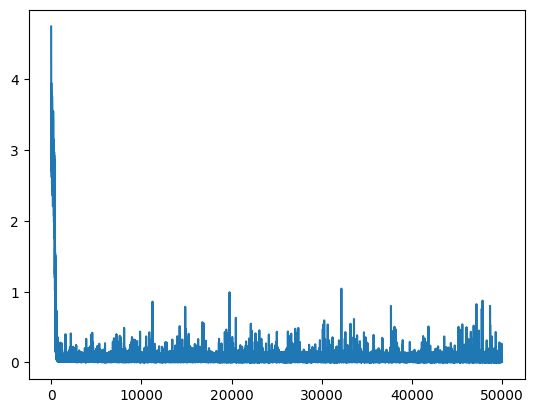

In [3]:
train = Trainer("shakespeare-data.txt", 50, 128, 64, 8, 12, 0.001,50000)
train.run()
train.save_model()

plt.plot(train.running_loss)
plt.show()

In [ ]:
# train = Trainer("shakespeare-data.txt", 50, 128, 64, 8, 12, 0.001, 6000)
# train.load_model()

phrase = "Very well; and "
phrase_final = "Very well; and "

for _ in range(60) : 

    lettre = test(train, phrase)
    phrase_final += phrase[0]
    phrase = phrase[1:] + lettre[0]
    


print(phrase_final)

All: All:                                                        
